In [1]:
import torch
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
!pip install kmeans-pytorch

In [4]:
from kmeans_pytorch import kmeans, kmeans_predict
import torch.utils.data as data_utils

In [7]:
from google.colab import files
uploaded = files.upload()

Saving housing-price.csv to housing-price.csv


In [9]:
import io
data = pd.read_csv(io.StringIO(uploaded['housing-price.csv'].decode('utf-8')))

In [10]:
target_df = data[['median_house_value']]
data = data[['longitude', 'latitude', 'median_income']]

In [11]:
df_tensor = torch.tensor(data.to_numpy())
#target_df = torch.tensor(target_df.to_numpy())

df_tensor


tensor([[-122.2300,   37.8800,    8.3252],
        [-122.2200,   37.8600,    8.3014],
        [-122.2400,   37.8500,    7.2574],
        ...,
        [-121.2200,   39.4300,    1.7000],
        [-121.3200,   39.4300,    1.8672],
        [-121.2400,   39.3700,    2.3886]], dtype=torch.float64)

In [12]:
class house_dataset(data_utils.Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    
    def __float__(self):
        return 0.0

In [13]:
dataset = house_dataset(df_tensor, target_df)
dataset[0:5]

(tensor([[-122.2300,   37.8800,    8.3252],
         [-122.2200,   37.8600,    8.3014],
         [-122.2400,   37.8500,    7.2574],
         [-122.2500,   37.8500,    5.6431],
         [-122.2500,   37.8500,    3.8462]], dtype=torch.float64),
    median_house_value
 0            452600.0
 1            358500.0
 2            352100.0
 3            341300.0
 4            342200.0)

In [14]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [15]:
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(
    X=df_tensor, num_clusters=num_clusters, distance='euclidean', device=device
)

print(cluster_ids_x)
print(cluster_centers)

running k-means on cpu..


[running kmeans]: 17it [00:00, 55.47it/s, center_shift=0.000096, iteration=17, tol=0.000100]

tensor([1, 1, 1,  ..., 1, 1, 1])
tensor([[-117.9979,   33.9731,    3.1294],
        [-121.7320,   37.9822,    3.6815],
        [-118.3069,   34.0922,    6.9395]])


In [16]:
y = df_tensor
y

tensor([[-122.2300,   37.8800,    8.3252],
        [-122.2200,   37.8600,    8.3014],
        [-122.2400,   37.8500,    7.2574],
        ...,
        [-121.2200,   39.4300,    1.7000],
        [-121.3200,   39.4300,    1.8672],
        [-121.2400,   39.3700,    2.3886]], dtype=torch.float64)

In [17]:
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)

predicting on cpu..


In [18]:
print(cluster_ids_y)

tensor([1, 1, 1,  ..., 1, 1, 1])


In [19]:
import seaborn as sns

[running kmeans]: 17it [00:59,  3.53s/it, center_shift=0.000096, iteration=17, tol=0.000100]


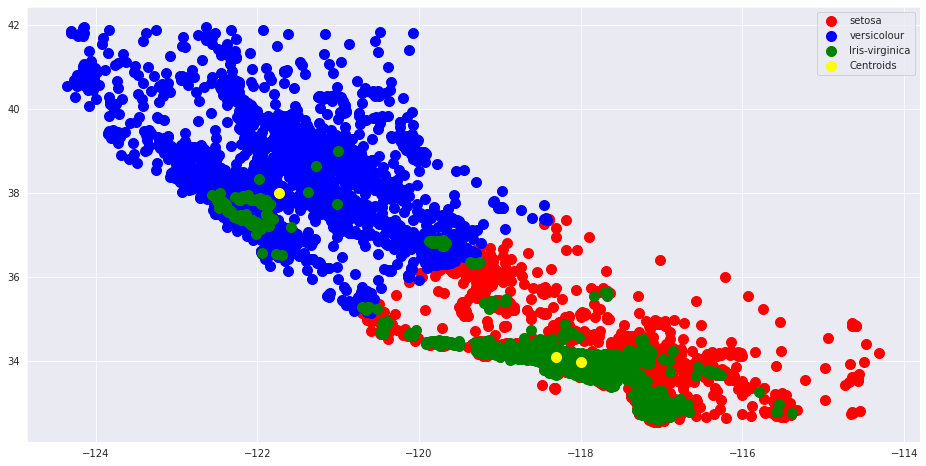

In [20]:
# Visualising the clusters - On the first two columns
sns.set_style("darkgrid")
plt.figure(figsize = (16,8))
plt.scatter(df_tensor[cluster_ids_y == 0, 0], df_tensor[cluster_ids_y == 0, 1], 
            s = 100, c = 'red', label = 'setosa')
plt.scatter(df_tensor[cluster_ids_y == 1, 0], df_tensor[cluster_ids_y == 1, 1], 
            s = 100, c = 'blue', label = 'versicolour')
plt.scatter(df_tensor[cluster_ids_y == 2, 0], df_tensor[cluster_ids_y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(cluster_centers[:, 0], cluster_centers[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()